In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random

### Data Load

In [5]:
df = pd.read_csv('vgchartz-2024.csv')

In [6]:
df.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


# Missing Values

In [8]:
df.isnull().sum()

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

#### developer

In [9]:
developer_na = df['developer'].isnull()

df['developer'] = df['developer'].fillna(df['publisher'])

df[developer_na]

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
8486,/games/boxart/21030ccc.jpg,Gourmet Chef: Cook Your Way to Fame,DS,Misc,Ubisoft,Ubisoft,NaN,0.14,0.13,NaN,NaN,0.01,2008-06-24,NaN
10832,/games/boxart/2426879ccc.jpg,Wordmaster,DS,Strategy,"Destination Software, Inc","Destination Software, Inc",NaN,0.09,0.09,NaN,0.0,0.01,2008-08-12,NaN
18185,/games/boxart/8436780ccc.jpg,SAS: Secure Tomorrow,PC,Shooter,City Interactive,City Interactive,NaN,0.00,NaN,NaN,0.0,0.00,2008-10-16,NaN
18455,/games/boxart/default.jpg,My Baby and Me,Wii,Misc,Unknown,Unknown,NaN,0.00,NaN,NaN,0.0,NaN,NaN,NaN
19925,/games/boxart/default.jpg,Bounty Hunter,PC,Action,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,1999-11-30,NaN
25045,/games/boxart/default.jpg,Abandoner,PC,Adventure,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,2004-09-17,NaN
27407,/games/boxart/full_7747476AmericaFrontccc.jpg,The Enchanted Unicorn,PC,Adventure,Take-Two Interactive,Take-Two Interactive,NaN,NaN,NaN,NaN,NaN,NaN,2008-09-16,NaN
31230,/games/boxart/full_8222233PALFrontccc.png,istanbul Beyleri,PC,Fighting,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,2006-12-17,NaN
37057,/games/boxart/1105699ccc.jpg,Purrfect Pet Shop,PC,Misc,eGames,eGames,NaN,NaN,NaN,NaN,NaN,NaN,2008-06-13,NaN
40753,/games/boxart/default.jpg,Duludubi Star,PC,Platform,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### sales

In [10]:
sales_col = ['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']

df[sales_col] = df[sales_col].fillna(0)

In [11]:
df[np.where(abs(df['total_sales'] - df[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum(axis=1)) > 0.1,True, False)].shape[0]

0

#### critic score

In [12]:
df[df['critic_score'].isnull()]

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
23,/games/boxart/full_2236292AmericaFrontccc.png,Halo 4,X360,Shooter,Microsoft Studios,343 Industries,NaN,9.96,6.72,0.04,2.36,0.83,2012-11-06,NaN
25,/games/boxart/full_6532460AmericaFrontccc.jpg,Call of Duty: Black Ops IIII,PS4,Shooter,Activision,Treyarch,NaN,9.32,4.05,0.50,3.28,1.49,2018-10-12,2018-11-07
26,/games/boxart/full_5970958AmericaFrontccc.jpg,FIFA 19,PS4,Sports,Electronic Arts,EA Sports,NaN,9.15,0.84,0.10,6.87,1.34,2018-09-28,2018-09-12
33,/games/boxart/full_5731689AmericaFrontccc.jpg,FIFA 13,PS3,Sports,EA Sports,EA Canada,NaN,8.01,1.07,0.13,5.13,1.68,2012-09-25,2018-04-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64011,/games/boxart/full_2779838AmericaFrontccc.jpg,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,0.00,0.00,0.00,0.00,0.00,2016-08-11,2019-01-28
64012,/games/boxart/full_8031506AmericaFrontccc.jpg,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,0.00,0.00,0.00,0.00,0.00,2020-07-30,2020-05-09
64013,/games/boxart/full_6553045AmericaFrontccc.jpg,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,0.00,0.00,0.00,0.00,0.00,2020-07-30,2020-05-09
64014,/games/boxart/full_6012940JapanFrontccc.png,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,0.00,0.00,0.00,0.00,0.00,2019-02-28,2019-02-24


<Axes: >

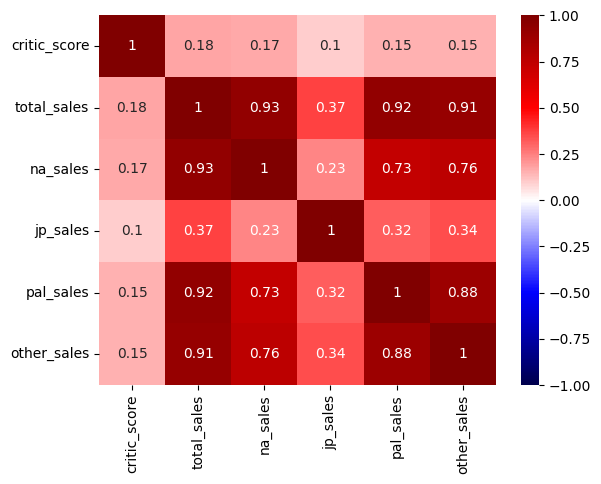

In [13]:
temp = df[df['critic_score'].notnull()]

import seaborn as sns
sns.heatmap(temp[['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']].corr(), 
            vmin = -1, vmax =1, cmap = 'seismic', annot = True)

<Axes: ylabel='Frequency'>

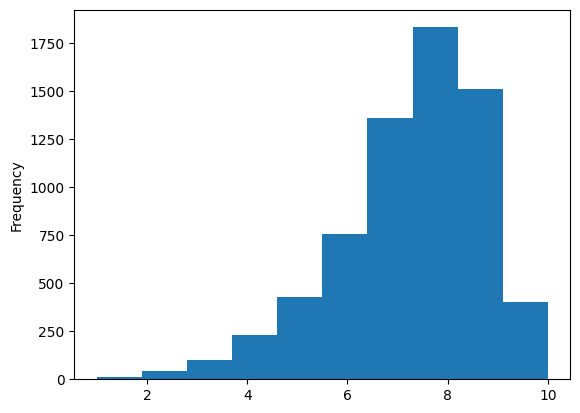

In [14]:
import matplotlib.pyplot as plt
df['critic_score'].plot(kind = 'hist')

#### Drop img

In [15]:
df.drop(columns = 'img', inplace = True)

# EDA

In [16]:
df.head()

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


## Top Selling 30

#### Title

In [17]:
df.groupby('title')['total_sales'].sum().sort_values(ascending=False).head(30)

title
Grand Theft Auto V                   64.29
Call of Duty: Black Ops              30.99
Call of Duty: Modern Warfare 3       30.71
Call of Duty: Black Ops II           29.59
Call of Duty: Ghosts                 28.80
Call of Duty: Black Ops 3            26.72
Call of Duty: Modern Warfare 2       25.02
Minecraft                            24.01
Grand Theft Auto IV                  22.53
Call of Duty: Advanced Warfare       21.78
The Elder Scrolls V: Skyrim          20.51
Call of Duty: WWII                   19.82
Red Dead Redemption 2                19.71
Call of Duty 4: Modern Warfare       18.33
FIFA 15                              18.03
Battlefield 3                        17.32
FIFA 14                              17.31
FIFA 17                              17.02
FIFA 18                              16.92
Guitar Hero III: Legends of Rock     16.38
Grand Theft Auto: Vice City          16.19
Call of Duty: World at War           15.94
FIFA 16                              15.82
FIFA 

#### Franchise

In [18]:
franchise_list = ['Call of Duty', 'Grand Theft Auto', 'Minecraft', 'FIFA', 'Battlefield', 'LEGO', 'The Sims', 
                  'The Elder Scrolls', 'Red Dead Redemption', 'Guitar Hero', 'Assassin\'s Creed', 'Fallout', 'Destiny',
                 'Star Wars', 'Need for Speed', 'Arkham', 'Halo', 'Watch Dogs', 'Medal of Honor', 'Resident Evil', 'NFL', 
                 'Far Cry ', 'Overwatch', 'NBA', 'Harry Potter', 'Spider-Man', 'Tony Hawk\'s', 'Tomb Raider', 'Tom Clancy',
                 'Monopoly', 'Just Dance', 'Final Fantasy', 'WWE', 'Street Fighter', 'Mario', 'The Simpsons', 'Borderlands', 'Uncharted',
                 'The Lord of the Rings', 'Crash Bandicoot']

df['franchise'] = np.nan
for each_franchise in franchise_list:
    df['franchise'] = np.where(df['title'].str.contains(each_franchise), each_franchise, df['franchise'])
    
df['franchise'] = np.where(df['title'].str.contains('Lego'), 'LEGO', df['franchise'])

df['franchise'] = np.where(df['franchise'] == 'nan', df['title'], df['franchise'])

In [19]:
df.groupby('franchise')['total_sales'].sum().sort_values(ascending=False).head(30)

franchise
Call of Duty           301.67
FIFA                   212.18
NFL                    166.18
Grand Theft Auto       155.26
NBA                    140.84
Star Wars              125.28
Need for Speed         104.82
LEGO                    99.30
Assassin's Creed        97.81
Tom Clancy              69.72
The Sims                69.48
Battlefield             64.66
WWE                     61.57
Guitar Hero             60.33
Tony Hawk's             51.66
The Elder Scrolls       43.91
Tomb Raider             42.43
Harry Potter            42.33
Final Fantasy           41.43
Medal of Honor          37.81
Just Dance              37.38
Spider-Man              36.90
Red Dead Redemption     35.09
Fallout                 33.69
Mario                   31.62
Destiny                 31.09
Arkham                  30.77
Minecraft               28.77
Halo                    27.29
Far Cry                 25.95
Name: total_sales, dtype: float64

#### Publisher

In [20]:
df['publisher'] = np.where(df['publisher'] == 'EA Sports', 'Electronic Arts', df['publisher'])
df['publisher'] = np.where(df['publisher'] == 'EA Sports BIG', 'Electronic Arts', df['publisher'])


df['publisher'] = np.where(df['publisher'] == 'Namco', 'Namco Bandai Games', df['publisher'])
df['publisher'] = np.where(df['publisher'] == 'Bandai', 'Namco Bandai Games', df['publisher'])
df['publisher'] = np.where(df['publisher'] == 'Namco Bandai', 'Namco Bandai Games', df['publisher'])

df['publisher'] = np.where(df['publisher'] == 'Microsoft Studios', 'Microsoft Game Studios', df['publisher'])

df['publisher'] = np.where(df['publisher'] == 'Warner Bros. Interactive', 'Warner Bros. Interactive Entertainment', df['publisher'])

df['publisher'] = np.where(df['publisher'] == '2K Sports', '2K Games', df['publisher'])

df['publisher'] = np.where(df['publisher'] == 'Konami', 'Konami Digital Entertainment', df['publisher'])

In [21]:
df.groupby('publisher')['total_sales'].sum().sort_values(ascending=False).head(30)

publisher
Electronic Arts                           1157.30
Activision                                 722.77
Ubisoft                                    462.57
THQ                                        320.89
Sony Computer Entertainment                311.08
Konami Digital Entertainment               241.30
Rockstar Games                             239.67
Namco Bandai Games                         231.66
Sega                                       206.38
Warner Bros. Interactive Entertainment     181.58
2K Games                                   160.88
Nintendo                                   140.80
Capcom                                     131.24
LucasArts                                  118.48
Microsoft Game Studios                     113.94
Bethesda Softworks                         111.08
Disney Interactive Studios                 103.30
Atari                                      101.63
Square Enix                                 95.74
Midway Games                            

## Platform Power

In [22]:
df['console'].unique()

array(['PS3', 'PS4', 'PS2', 'X360', 'XOne', 'PC', 'PSP', 'Wii', 'PS',
       'DS', '2600', 'GBA', 'NES', 'XB', 'PSN', 'GEN', 'PSV', 'DC', 'N64',
       'SAT', 'SNES', 'GBC', 'GC', 'NS', '3DS', 'GB', 'WiiU', 'WS', 'VC',
       'NG', 'WW', 'SCD', 'PCE', 'XBL', '3DO', 'GG', 'OSX', 'Mob', 'PCFX',
       'Series', 'All', 'iOS', '5200', 'And', 'DSiW', 'Lynx', 'Linux',
       'MS', 'ZXS', 'ACPC', 'Amig', '7800', 'DSi', 'AJ', 'WinP', 'iQue',
       'GIZ', 'VB', 'Ouya', 'NGage', 'AST', 'MSD', 'S32X', 'XS', 'PS5',
       'Int', 'CV', 'Arc', 'C64', 'FDS', 'MSX', 'OR', 'C128', 'CDi',
       'CD32', 'BRW', 'FMT', 'ApII', 'Aco', 'BBCM', 'TG16'], dtype=object)

In [23]:
df['console_comapny'] = np.nan

    
df['console_comapny'] = df['console'].map({'PS3': 'Sony', 'PS4': 'Sony', 'PS2': 'Sony', 'PS5': 'Sony', 
                                           'PSP': 'Sony', 'PS': 'Sony', 'PSN': 'Sony', 'PSV': 'Sony', 
                                           
                                           'X360': 'Microsoft', 'XOne': 'Microsoft', 'XS': 'Microsoft', 
                                           'XB': 'Microsoft', 'XBL': 'Microsoft',
                                          
                                           'PC': 'PC', 
                                           
                                           'Wii': 'Nintendo', 'DS': 'Nintendo', 'GBA': 'Nintendo', 'N64': 'Nintendo',
                                           'GBC': 'Nintendo', 'GC': 'Nintendo', '3DS': 'Nintendo', 'GB': 'Nintendo', 
                                           'WiiU': 'Nintendo', 'SNES': 'Nintendo', 'NES': 'Nintendo', 'NS': 'Nintendo', 
                                           
                                           'DC': 'Sega', 'SAT': 'Sega', 'GG': 'Sega', 'MSD': 'Sega', 'MS': 'Sega', 
                                           'GEN': 'Sega', 'SCD': 'Sega', 
                                           
                                           '2600': 'atari', '7800': 'atari',
                                           
                                           'iOS': 'Apple', 'ApII': 'Apple',
                                           
                                           'And': 'Google',
                                          })

df['console_comapny'] = df['console_comapny'].fillna('ETC')

#### Sales

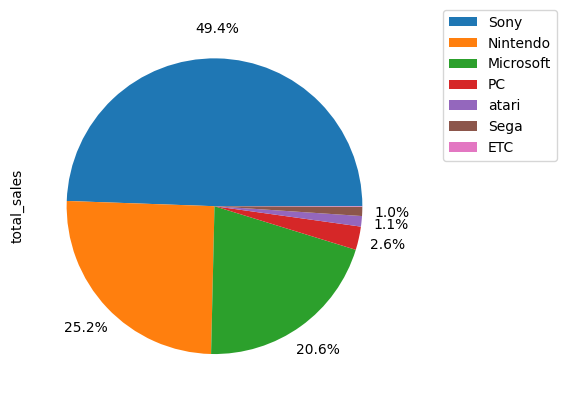

In [24]:
autopct = lambda v: f'{v:.1f}%' if v > 1 else None #Removes labels below 1%

df.groupby('console_comapny')['total_sales'].sum().sort_values(ascending=False).plot(kind = 'pie', autopct=autopct, 
                                                                                     labeldistance=None, pctdistance=1.2)
plt.legend(bbox_to_anchor=(1.1, 1.05))

#### Title Numbers

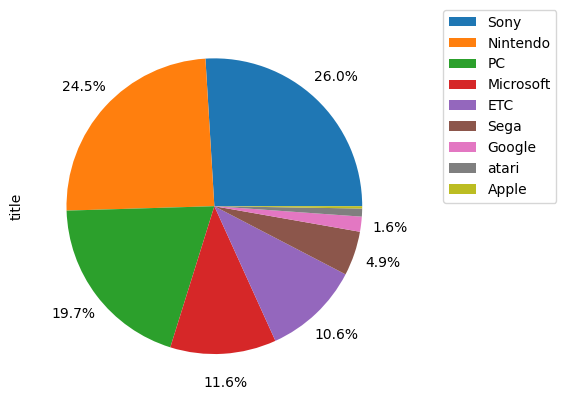

In [25]:
autopct = lambda v: f'{v:.1f}%' if v > 1 else None #Removes labels below 1%

df.groupby('console_comapny')['title'].count().sort_values(ascending=False).plot(kind = 'pie', autopct=autopct, 
                                                                                     labeldistance=None, pctdistance=1.2)
plt.legend(bbox_to_anchor=(1.1, 1.05))

#### Sony Playstation

<Axes: xlabel='console', ylabel='total_sales'>

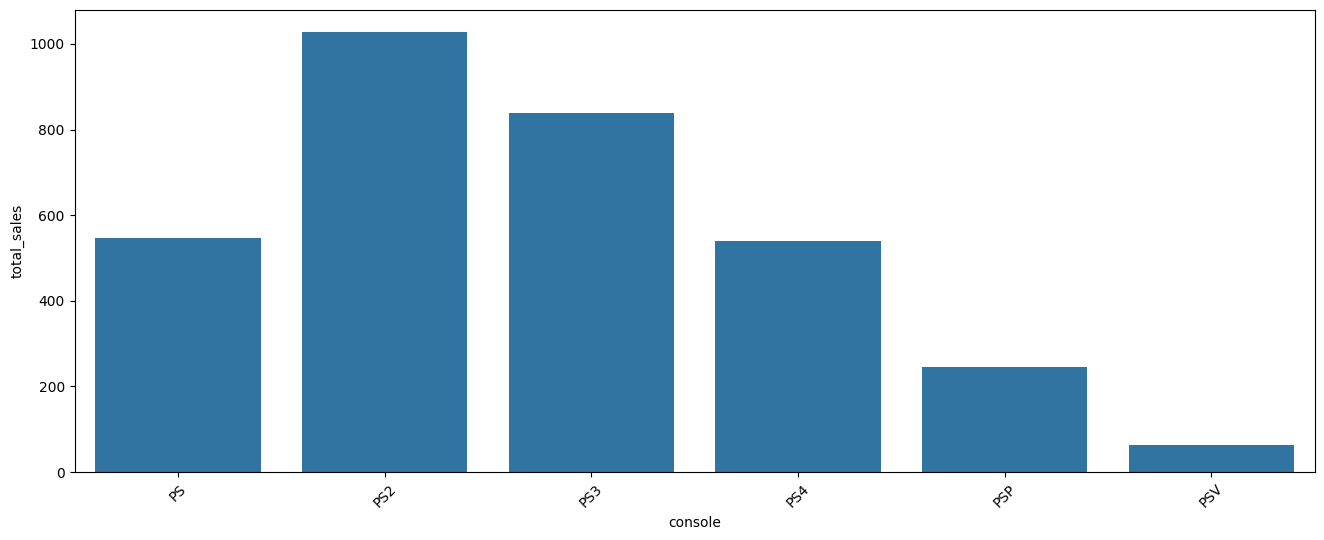

In [26]:
import seaborn as sns

fig, ax = plt.subplots( figsize = ( 16, 6 ) )
plt.xticks(rotation=45)
sns.barplot(data=df[df['console_comapny'] == 'Sony'], 
            x='console', y='total_sales', errorbar=None, estimator = 'sum',
            order = ['PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV'])

PSV titles somehow have sales but PS5 titles have NaN values

In [27]:
df[df['console'] == 'PS5'].head()

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,franchise,console_comapny
23352,Dawn of the Monsters,PS5,Action,Unknown,13AM Games,NaN,0.0,0.0,0.0,0.0,0.0,NaN,2022-03-10,Dawn of the Monsters,Sony
23506,Armored Core VI Fires of Rubicon,PS5,Action,Bandai Namco Entertainment,From Software,NaN,0.0,0.0,0.0,0.0,0.0,2023-08-25,2022-12-09,Armored Core VI Fires of Rubicon,Sony
23552,Blackwind,PS5,Action,Unknown,Drakkar Dev,NaN,0.0,0.0,0.0,0.0,0.0,NaN,2022-01-19,Blackwind,Sony
23576,BloodRayne Betrayal: Fresh Bites,PS5,Action,Unknown,WayForward,NaN,0.0,0.0,0.0,0.0,0.0,NaN,2021-06-14,BloodRayne Betrayal: Fresh Bites,Sony
23613,Cannon Dancer – Osman,PS5,Action,Unknown,Mitchell Corporation,NaN,0.0,0.0,0.0,0.0,0.0,NaN,2023-04-12,Cannon Dancer – Osman,Sony


In [28]:
df[df['console'] == 'PS5']['total_sales'].sum()

np.float64(0.0)

#### Microsoft Xbox

<Axes: xlabel='console', ylabel='total_sales'>

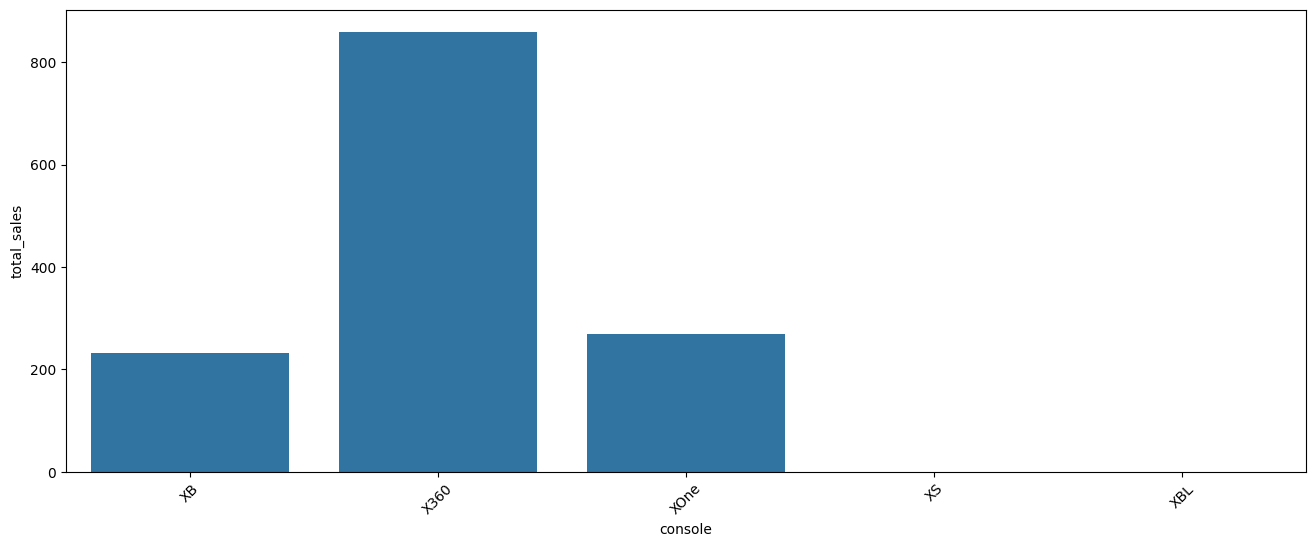

In [29]:
fig = plt.subplots( figsize = ( 16, 6 ) )
plt.xticks(rotation=45)
sns.barplot(data=df[df['console_comapny'] == 'Microsoft'], 
            x='console', y='total_sales', errorbar=None, estimator = 'sum',
            order = ['XB', 'X360', 'XOne', 'XS', 'XBL'])

There are missing values in XS Earning

In [30]:
df[df['console'] == 'XS'].head()

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,franchise,console_comapny
23350,Dawn of the Monsters,XS,Action,Unknown,13AM Games,NaN,0.0,0.0,0.0,0.0,0.0,NaN,2022-03-10,Dawn of the Monsters,Microsoft
23504,Armored Core VI Fires of Rubicon,XS,Action,Bandai Namco Entertainment,From Software,NaN,0.0,0.0,0.0,0.0,0.0,2023-08-25,2022-12-09,Armored Core VI Fires of Rubicon,Microsoft
23521,Azure Striker Gunvolt 3,XS,Action,Unknown,Inti Creates,NaN,0.0,0.0,0.0,0.0,0.0,NaN,2022-08-18,Azure Striker Gunvolt 3,Microsoft
23550,Blackwind,XS,Action,Unknown,Drakkar Dev,NaN,0.0,0.0,0.0,0.0,0.0,NaN,2022-01-19,Blackwind,Microsoft
23577,BloodRayne Betrayal: Fresh Bites,XS,Action,Unknown,WayForward,NaN,0.0,0.0,0.0,0.0,0.0,NaN,2021-06-14,BloodRayne Betrayal: Fresh Bites,Microsoft


In [31]:
df[df['console'] == 'XS']['total_sales'].sum()

np.float64(0.0)

In [32]:
df[df['console'] == 'XBL']['total_sales'].sum()

np.float64(0.2)

## Market Share

#### Region

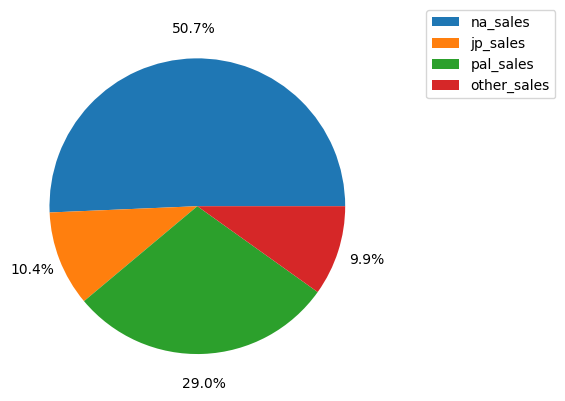

In [33]:
df[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum().plot(kind = 'pie', autopct='%1.1f%%', 
                                                                                     labeldistance=None, pctdistance=1.2)
plt.legend(bbox_to_anchor=(1.1, 1.05))

#### Genre

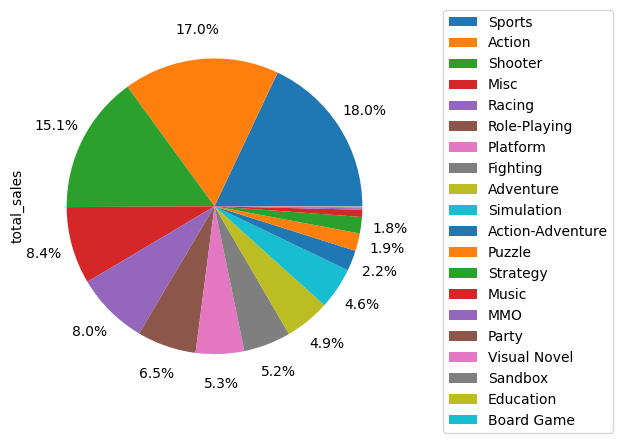

In [34]:
autopct = lambda v: f'{v:.1f}%' if v > 1 else None

df.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind = 'pie', autopct=autopct, 
                                                                                     labeldistance=None, pctdistance=1.2)
plt.legend(bbox_to_anchor=(1.1, 1.05))

#### Region and genre

<Axes: xlabel='genre', ylabel='sales'>

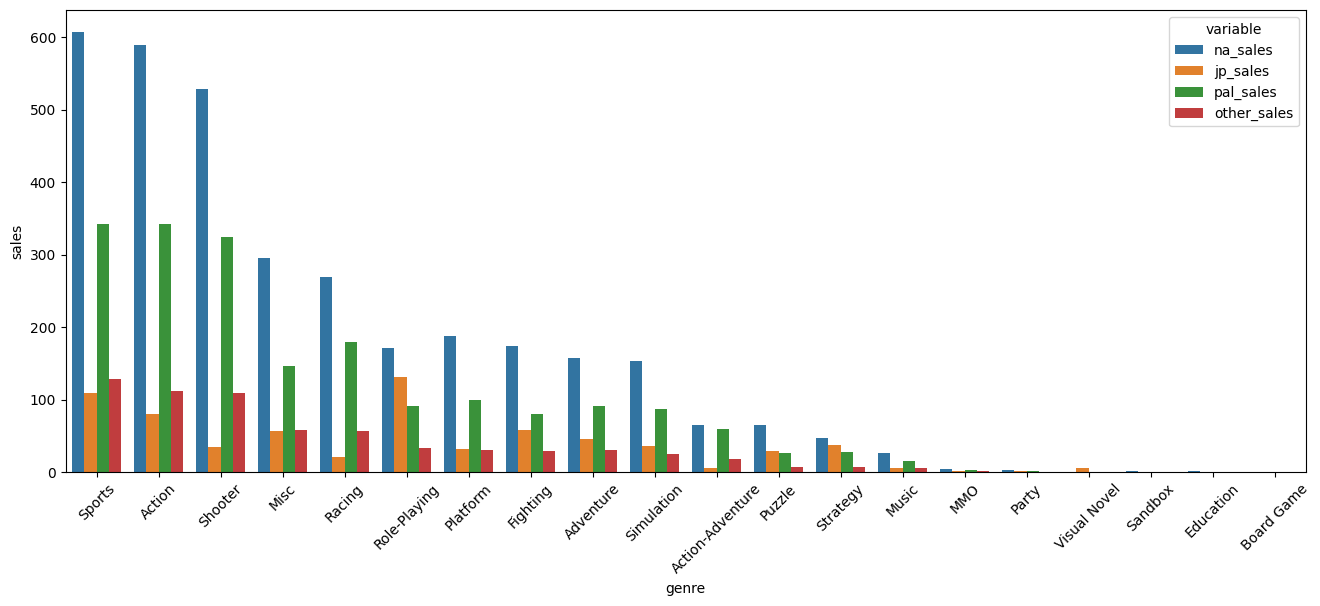

In [35]:
fig = plt.subplots( figsize = ( 16, 6 ) )
plt.xticks(rotation=45) 
sns.barplot(data=df.melt(id_vars = 'genre', value_vars = ['na_sales', 'jp_sales', 'pal_sales', 'other_sales'], value_name = 'sales'), 
            x='genre', y='sales', hue = 'variable', errorbar=None, estimator = 'sum',
            order = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False).index)

#### JP Market
RPG is very Popular.

<Axes: xlabel='genre', ylabel='jp_sales'>

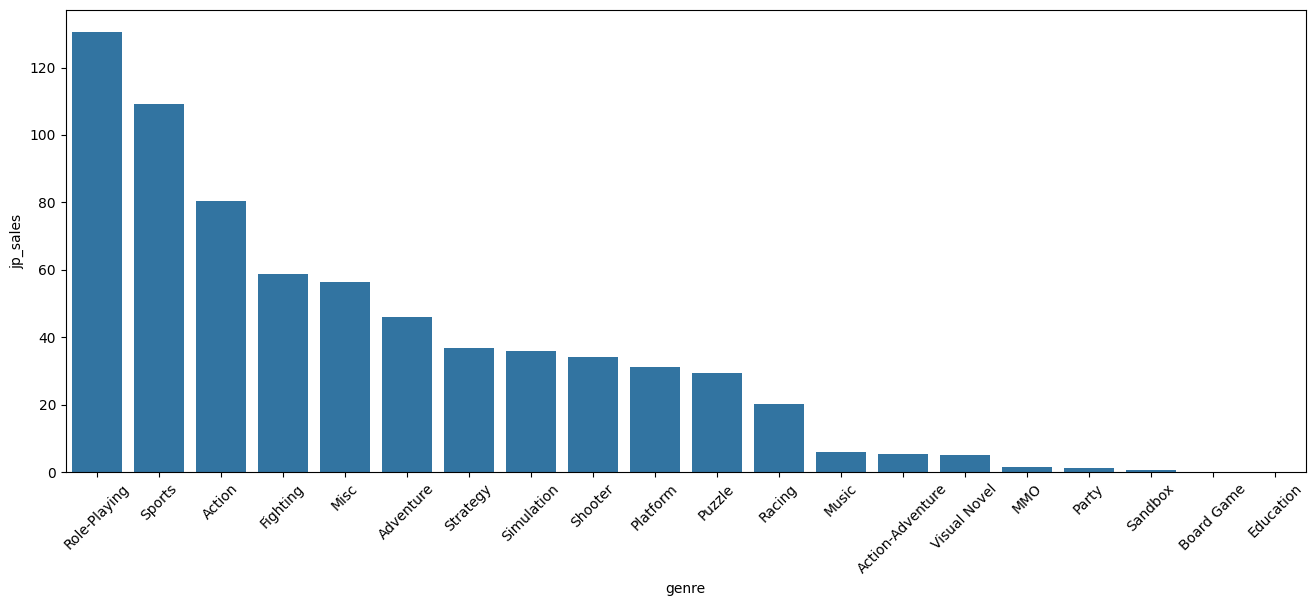

In [36]:
import seaborn as sns

fig, ax = plt.subplots( figsize = ( 16, 6 ) )
plt.xticks(rotation=45)
sns.barplot(data=df, 
            x='genre', y='jp_sales', errorbar=None, estimator = 'sum',
            order = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).index)

### Z-Score Analysis on Video Game Sales

We'll perform Z-score analysis on the numeric sales columns to identify games with unusually high or low sales across different regions.

In [37]:
from scipy.stats import zscore

sales_cols = ['na_sales', 'pal_sales', 'jp_sales', 'other_sales', 'total_sales']
sales_df = df[sales_cols]
z_scores = sales_df.apply(zscore)

for col in sales_cols:
    df[f'{col}_zscore'] = z_scores[col]

df['Global_Sales_zscore'] = zscore(df['total_sales'].fillna(0))

# Find outliers in Global Sales
outliers = df[np.abs(df['Global_Sales_zscore']) > 3]
outliers[['title', 'console', 'total_sales', 'Global_Sales_zscore']].sort_values(by='Global_Sales_zscore', ascending=False)


,title,console,total_sales,Global_Sales_zscore
0,Grand Theft Auto V,PS3,20.32,43.291200
1,Grand Theft Auto V,PS4,19.39,41.299748
2,Grand Theft Auto: Vice City,PS2,16.15,34.361784
3,Grand Theft Auto V,X360,15.86,33.740793
4,Call of Duty: Black Ops 3,PS4,15.09,32.091956
...,...,...,...,...
810,NBA Live 98,PS,1.51,3.012465
811,Call of Duty: Black Ops II,PC,1.51,3.012465
812,Tomb Raider: Definitive Edition,PS4,1.51,3.012465
813,Simpsons Wrestling,PS,1.51,3.012465


### Visual Representation of Z-Scores

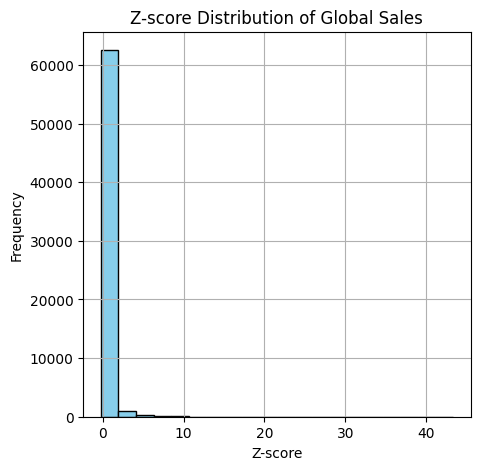

In [38]:
plt.figure(figsize=(5, 5))
plt.hist(df['Global_Sales_zscore'], bins=20, edgecolor='black', color='skyblue')
plt.title('Z-score Distribution of Global Sales')
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Functions for further data analysis according to input provided

In [39]:
df["Name_lower"] = df["title"].str.lower()
df["Platform_lower"] = df["console"].str.lower()
def get_game_info(game_name, platform):
    game_name = game_name.lower()
    platform = platform.lower()
    
    game_data = df[(df["Name_lower"] == game_name) & (df["Platform_lower"] == platform)]
    
    if game_data.empty:
        return "Game not found in dataset for the specified platform."
    
    return game_data.drop(columns=["Name_lower", "Platform_lower"])

def suggest_by_genre(game_name):
    game_name = game_name.lower()
    game_data = df[df["Name_lower"] == game_name]
    
    if game_data.empty:
        return "Game not found in dataset."
    
    genre = game_data.iloc[0]["genre"]
    
    related_games = df[(df["genre"] == genre) & (df["Name_lower"] != game_name)]["title"].unique()
    
    if len(related_games) == 0:
        return "No suggestions found."
    
    num_suggestions = min(5, len(related_games))
    suggestions = random.sample(list(related_games), num_suggestions)
    
    return suggestions

def suggest_by_publisher(game_name):
    game_name = game_name.lower()
    game_data = df[df["Name_lower"] == game_name]
    
    if game_data.empty:
        return "Game not found in dataset."
    
    publisher = game_data.iloc[0]["publisher"]
    
    related_games = df[(df["publisher"] == publisher) & (df["Name_lower"] != game_name)]["title"].unique()
    
    if len(related_games) == 0:
        return "No suggestions found."
    
    num_suggestions = min(5, len(related_games))
    suggestions = random.sample(list(related_games), num_suggestions)
    
    return suggestions

In [40]:
# Choose an option:
# 1: Show all details about a specific game
# 2: Suggest more games from the same genre
# 3: Suggest more games from the same publisher

choice = 1  # input("Enter your choice (1/2/3): ")

game_input = "grand theft auto v"  # input("Enter the name of the game: ")
platform = "Ps4" # input("Enter the platform: ")

if choice == 1:
    print(get_game_info(game_input, platform))
elif choice == 2:
    print("Games from the same genre:")
    print(suggest_by_genre(game_input))
elif choice == 3:
    print("Games from the same publisher:")
    print(suggest_by_publisher(game_input))
else:
    print("Invalid choice.")

                title console   genre       publisher       developer  \
1  Grand Theft Auto V     PS4  Action  Rockstar Games  Rockstar North   

   critic_score  total_sales  na_sales  jp_sales  pal_sales  ...  \
1           9.7        19.39      6.06       0.6       9.71  ...   

   release_date last_update         franchise console_comapny na_sales_zscore  \
1    2014-11-18  2018-01-03  Grand Theft Auto            Sony       24.644317   

   pal_sales_zscore  jp_sales_zscore  other_sales_zscore  total_sales_zscore  \
1          52.14443         9.343403           46.867273           41.299748   

   Global_Sales_zscore  
1            41.299748  

[1 rows x 21 columns]
